<a href="https://colab.research.google.com/github/SubhadipGhosh07/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title: Sentiment Analysis : Predicting sentiment of COVID-19 tweets</b>

### <b>Problem Description:</b>

Our objective is to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.

We are given the following information:
* Location: (Location of the user)
* Tweet At: (Date at which the tweet was made)
* Original Tweet: (The exact tweet)
* Sentiment: (Sentiment of the tweet)

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Basic Data Inspection:
* Reading our dataset
* Checking Duplicate records
* Checking Null/Missing values
* Checking the Location of users

In [ ]:
# Reading our dataset
df = pd.read_csv(r"C:\Users\Subho\Downloads\Copy of Coronavirus Tweets.csv", encoding = 'latin-1')
pd.set_option('display.max_columns', None)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Printing the shape of our dataset
print("Rows: {}, columns: {}".format(df.shape[0], df.shape[1]))

Rows: 41157, columns: 6


In [ ]:
# Checking duplicated records
df.duplicated(subset=['UserName']).sum()

0

### Checking Null Values (Missing Values) in our dataset:

<AxesSubplot:>

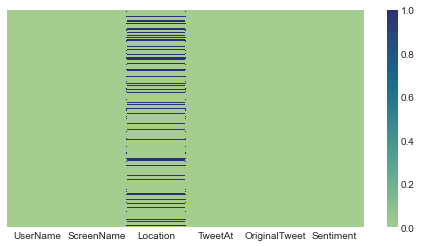

In [ ]:
# Checking Nan Values in our dataset
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

### Checking the Location of most users:

<AxesSubplot:>

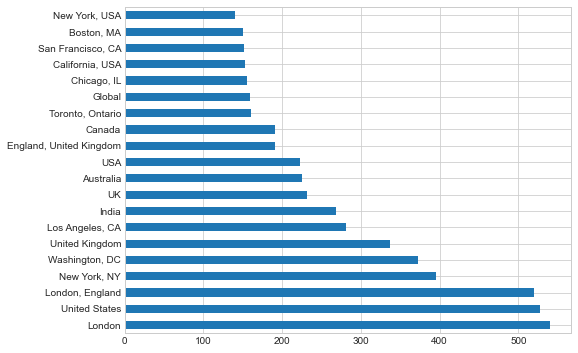

In [ ]:
# Locations of users
plt.figure(figsize = (8,6))
df['Location'].value_counts().head(20).plot(kind = 'barh')

In [ ]:
# Creating a copy to our dataset
data = df.copy()
# Removing the 'Location' column
data.drop('Location', axis = 1, inplace = True)

In [ ]:
# We can remove the column 'ScreenName'
data.drop('ScreenName', axis = 1, inplace = True)

In [ ]:
data.head(5)

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Labeling our response feature 'Sentiment':
* Combining 'Positive' and 'Extremely Positive' sentiment as 1
* Combining 'Negative' and 'Extremely Negative' sentiment as 2
* Changing the labbel of 'Neutral' as 0

In [ ]:
# Changing sentiment labels
# Combining Positive and extremely positive class labels
# Combining Negative and extremely negative class labels

def sentiment_label(tweet):
    if tweet=='Neutral':
        return 0
    elif (tweet=='Positive') or  (tweet=='Extremely Positive'):
        return 1
    else:
        return 2
    
data['Sentiment']=data['Sentiment'].apply(sentiment_label)

In [ ]:
data.head()

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,16-03-2020,"Me, ready to go at supermarket during the #COV...",2


Text(0.5, 1.0, 'Counts of Sentiments')

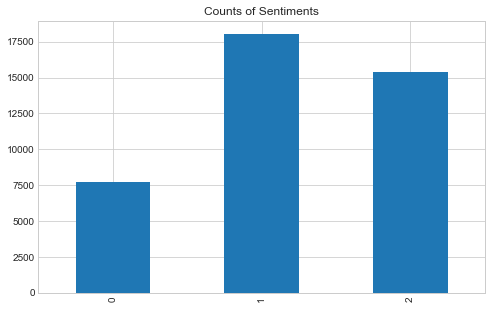

In [ ]:
# Plotting the counts of Sentiment
plt.figure(figsize=(8,5))
data['Sentiment'].value_counts().sort_index().plot(kind='bar')
plt.title("Counts of Sentiments")

Conclusion:
The number of Positive sentiments are just over 17500 and Negative sentiments are over 15000.
We have very less number of Neutral Sentiments to work with which are only 7500 in counts

# Text Pre-processing:
* Importing nltk libraries
* Removing punctuations,numerical and other special characters
* Removing stopwords
* Using PorterStemmer to convert words into their root forms
* Storing all the cleaned tweets in a list naming it 'corpus'
* Counting the number of words in our corpus and plot it in a distribution plot

In [ ]:
data.head()

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,16-03-2020,"Me, ready to go at supermarket during the #COV...",2


### **Checking tweets of different sentiments:**

In [ ]:
# Checking our first neutral tweet
data.iloc[0,2]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
# Checking our first positive tweet
data.iloc[1,2]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [ ]:
# Checking our first negative tweet
data.iloc[4,2]

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [ ]:
# dropping the date column as it won't be of use to us
data.drop('TweetAt',axis=1,inplace=True)

In [ ]:
# Importing Nltk libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import nltk
lm = WordNetLemmatizer()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Checking the first tweet in our dataset
data.loc[0, 'OriginalTweet'].split()

['@MeNyrbie',
 '@Phil_Gahan',
 '@Chrisitv',
 'https://t.co/iFz9FAn2Pa',
 'and',
 'https://t.co/xX6ghGFzCC',
 'and',
 'https://t.co/I2NlzdxNo8']

In [ ]:
# Storing all the cleaned tweets in a list
corpus=[]
for i in range(len(data)):
    tweet=data.loc[i, 'OriginalTweet']
    tweet=' '.join([word for word in tweet.split() if word[0:5]!='https'])
    substitute = re.sub("[^a-zA-Z]",' ',tweet)
    substitute=substitute.lower()
    final_tweet= ' '.join([lm.lemmatize(word) for word in substitute.split() if word not in stopwords.words("english")])
    corpus.append(final_tweet)

In [ ]:
# Printing the first tweets from our corpus
corpus[:10]

['menyrbie phil gahan chrisitv',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order',
 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak',
 'food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 'ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement',
 'news region first confirmed covid case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report',
 'cashier grocery store sharing insight covid prove credibility commented civics class know talking',
 'supermarket today buy toilet pa

Text(0.5, 1.0, 'Box-Plot of Word Counts')

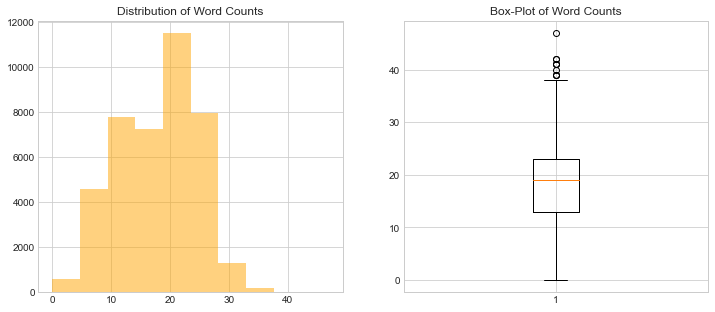

In [ ]:
# Counting the number of words in each tweet
corpus_word_count = [len(i.split()) for i in corpus]

# Plotting the length of words in a histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(corpus_word_count,histtype='stepfilled',alpha=0.5,color ='orange')
plt.title("Distribution of Word Counts")

plt.subplot(1,2,2)
plt.boxplot(corpus_word_count)
plt.title("Box-Plot of Word Counts")

Conclusion: 
Our distribution is very close to being normally distributed with only a few outliers when it comes to word counts.

In [ ]:
# Info of our corpus
print("Max word counts of a tweet: {}".format(max(corpus_word_count)))
print("Min word counts of a tweet: {}".format(min(corpus_word_count)))

Max word counts of a tweet: 47
Min word counts of a tweet: 0


## Removing certain tweets:
* Removing those tweets having word count less than 5 and greater than 30

In [ ]:
data.head()

,UserName,OriginalTweet,Sentiment
0,3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,advice Talk to your neighbours family to excha...,1
2,3801,Coronavirus Australia: Woolworths to give elde...,1
3,3802,My food stock is not the only one which is emp...,1
4,3803,"Me, ready to go at supermarket during the #COV...",2


In [ ]:
# Our dataset
data['word_count']=corpus_word_count
data['Modified_tweet'] = corpus
data.head()

,UserName,OriginalTweet,Sentiment,word_count,Modified_tweet
0,3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,4,menyrbie phil gahan chrisitv
1,3800,advice Talk to your neighbours family to excha...,1,27,advice talk neighbour family exchange phone nu...
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12,coronavirus australia woolworth give elderly d...
3,3802,My food stock is not the only one which is emp...,1,23,food stock one empty please panic enough food ...
4,3803,"Me, ready to go at supermarket during the #COV...",2,21,ready go supermarket covid outbreak paranoid f...


In [ ]:
# Describing word counts
data['word_count'].describe()

count    41157.000000
mean        18.030517
std          6.625369
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         47.000000
Name: word_count, dtype: float64

In [ ]:
# Removing tweets having word counts less than 5 and more than 38
tweets=data.copy()
tweets=tweets[tweets['word_count']>5]
tweets=tweets[tweets['word_count']<=38]
tweets.head()

,UserName,OriginalTweet,Sentiment,word_count,Modified_tweet
1,3800,advice Talk to your neighbours family to excha...,1,27,advice talk neighbour family exchange phone nu...
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12,coronavirus australia woolworth give elderly d...
3,3802,My food stock is not the only one which is emp...,1,23,food stock one empty please panic enough food ...
4,3803,"Me, ready to go at supermarket during the #COV...",2,21,ready go supermarket covid outbreak paranoid f...
5,3804,As news of the regionÂs first confirmed COVID...,1,27,news region first confirmed covid case came su...


In [ ]:
# Info about our dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40058 entries, 1 to 41156
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserName        40058 non-null  int64 
 1   OriginalTweet   40058 non-null  object
 2   Sentiment       40058 non-null  int64 
 3   word_count      40058 non-null  int64 
 4   Modified_tweet  40058 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


In [ ]:
# Updating the corpus
len(tweets)

40058

In [ ]:
tweets.head()

,UserName,OriginalTweet,Sentiment,word_count,Modified_tweet
1,3800,advice Talk to your neighbours family to excha...,1,27,advice talk neighbour family exchange phone nu...
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12,coronavirus australia woolworth give elderly d...
3,3802,My food stock is not the only one which is emp...,1,23,food stock one empty please panic enough food ...
4,3803,"Me, ready to go at supermarket during the #COV...",2,21,ready go supermarket covid outbreak paranoid f...
5,3804,As news of the regionÂs first confirmed COVID...,1,27,news region first confirmed covid case came su...


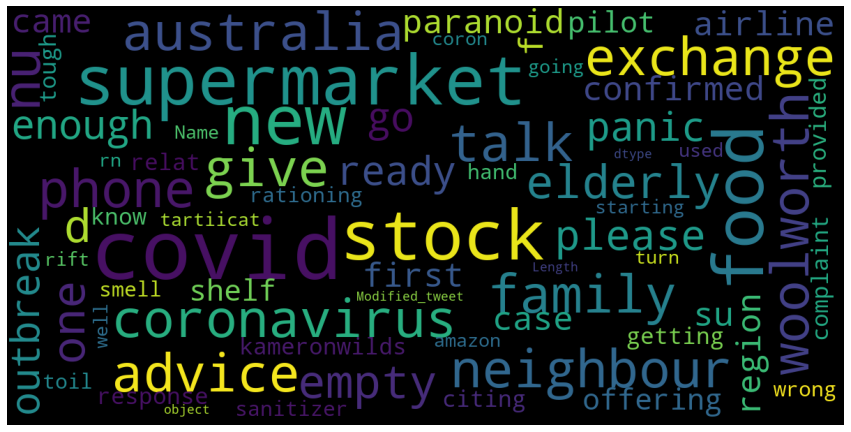

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def MyWordCloud(data):
    wordcloud = WordCloud(background_color=None,
                         stopwords=stopwords,
                         max_words=150,
                         max_font_size=40,
                         scale=3,
                         random_state=0,
                         ).generate(str(data))
    fig=plt.figure(1, figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
MyWordCloud(tweets['Modified_tweet'])

Text(0.5, 1.0, 'Counts of Sentiments after cleaning dataset')

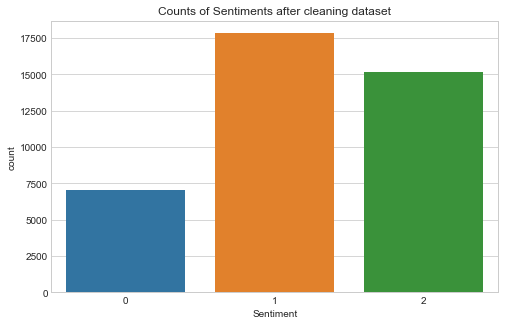

In [ ]:
# Plotting the counts of Sentiment
plt.figure(figsize=(8,5))
sns.countplot('Sentiment', data=tweets)
plt.title("Counts of Sentiments after cleaning dataset")

# Setting up our dataset before passing our dataset into LSTM:
* Setting up our vocabulary
* One hot representing using one_hot from Keras
* Padding our tweets to get all the tweets of equal word counts
* Embedding our padded-tweets

In [ ]:
# Importing tensorflow libraries for using LSTM
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense

In [ ]:
# Setting a Vocabulary size
vocab_size=10000

In [ ]:
# One hot representation
one_hot_repr=[one_hot(ii,vocab_size) for ii in tweets['Modified_tweet']]

In [ ]:
# Checking the maximum word count of a tweet
tweets['word_count'].describe()

count    40058.000000
mean        18.406810
std          6.278168
min          6.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         38.000000
Name: word_count, dtype: float64

In [ ]:
# Padding our words using pad_sequences
sentence_length = 38
embed_tweets=pad_sequences(one_hot_repr, padding='pre', maxlen=sentence_length)
print(embed_tweets[:4])

[[   0    0    0    0    0    0    0    0    0    0    0 3460 5458 1304
  4402 9375   35 6519 3670  209 4888   35 6519 1304 7656 9082 8984 8707
  8890 4499 7390 2753 1310 5821 8585  650 5655 3997]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 4644 1330
  3235 5213 4142 4259 6464 7390 2541  372  159 8944]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 9921 4712 7665 8005 8488 9538 6869 9921  889  610 6725  806  501
   806 9060  159 5544  159  159 4644 1021 1988 2004]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 7976 3808  977  159 8944  912 9921 4712 1578 8005 4644
  3312 2898 8488 9538 6214 6065 4231 8626 5522 1021]]


In [ ]:
embed_tweets.shape

(40058, 38)

# Setting up our LSTM Network:
* Setting input dimensions
* Setting up our LSTM model
* Adding Dropout layers to prevent overfitting

In [ ]:
# Creating our LSTM model

# Number of input dimensions
number_of_features=50

# Initialising model
model=Sequential()
model.add(Embedding(vocab_size, number_of_features, input_length=38))
model.add(Dropout(0.20))

# Adding LSTM layer
model.add(LSTM(50))
model.add(Dropout(0.20))

# Adding Dense outplut layer
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
# Printing summary of model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 38, 50)            500000    
_________________________________________________________________
dropout_14 (Dropout)         (None, 38, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 153       
Total params: 520,353
Trainable params: 520,353
Non-trainable params: 0
_________________________________________________________________


## Fitting and then evaluating our model:
* Splitting our data into train and test
* Prediction of our test data
* Evaluating our model using classification report and confusion matrix

In [ ]:
# Defining X and y
X=np.array(embed_tweets)
y=np.array(tweets['Sentiment'])

# Train-test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# Fitting our model
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=5, batch_size=320)

Epoch 1/5
94/94 [==============================] - 7s 60ms/step - loss: 0.9602 - val_loss: 0.7869
Epoch 2/5
94/94 [==============================] - 5s 54ms/step - loss: 0.6415 - val_loss: 0.6390
Epoch 3/5
94/94 [==============================] - 5s 54ms/step - loss: 0.4809 - val_loss: 0.6271
Epoch 4/5
94/94 [==============================] - 5s 53ms/step - loss: 0.4098 - val_loss: 0.6498
Epoch 5/5
94/94 [==============================] - 5s 53ms/step - loss: 0.3709 - val_loss: 0.6801


In [ ]:
# Predicting our test data
y_pred=model.predict_classes(X_test)

In [ ]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
confusion_matrix(y_test,y_pred)

array([[1114,  406,  280],
       [ 244, 3782,  450],
       [ 294,  767, 2678]], dtype=int64)

<AxesSubplot:>

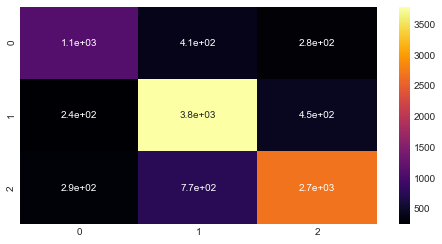

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='inferno')

In [ ]:
# Confusion report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65      1800
           1       0.76      0.84      0.80      4476
           2       0.79      0.72      0.75      3739

    accuracy                           0.76     10015
   macro avg       0.74      0.73      0.73     10015
weighted avg       0.76      0.76      0.75     10015



## Evaluation Summary:

* From the confusion matrix, we observe that our model has correctly predicted 1114 of the neutral sentiments, 3782 of our positive sentiments and 2678 of our negative sentiments
* We have achieved an overall precision of 76% and 79% for postive and negative sentiments respectively. And 67% for neutral sentiments which is'nt bad either as firstly, we had less data with neutral sentiments and it's quite difficult for the model to predict neutral sentiments
* Overall accuracy of our model is 76%
* Considering both recall and precision, we have a f1 score of 65%, 80% and 75% for neutral, positive and negative sentiments. Overall, our LSTM has worked well in predicting sentiments of these tweets